In [ ]:
from utils import openai_schema
from ome_types import OME
ignore = ["required", "default", 'title', 'name', 'namespace', "type", "description", "items", "enum", "anyOf", "allOf"]
openai_schema(OME, ignore)

In [ ]:
OME.model_json_schema()

In [6]:
sns.palettes._ColorPalette(sns.color_palette("Paired")[0::2])

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 1.0, 0.6)]

In [7]:
import seaborn as sns

type(sns.color_palette("Paired"))

sns.palettes._ColorPalette(sns.color_palette("Paired")[1::2])

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (1.0, 0.4980392156862745, 0.0),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

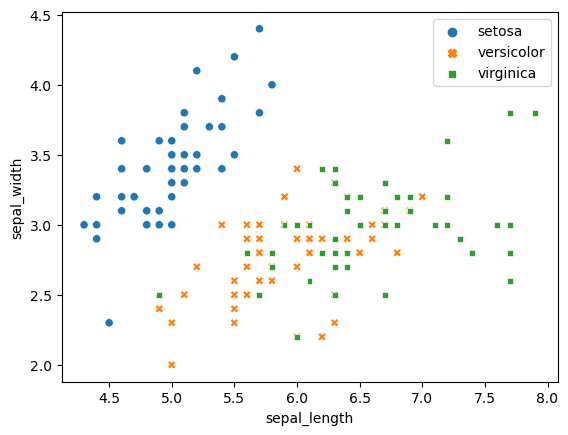

In [8]:
data = sns.load_dataset("iris")

ax = sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", style="species", data=data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [4]:
p = ["q", "d"]
p.append("a")
p

['q', 'd', 'a']

In [5]:
test = {}
test["test"] = {}
test["test"]["test"] = {}



In [1]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                generate_paths(item, new_path, paths)

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value


In [2]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}/{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                if isinstance(item, (dict, list)):
                    generate_paths(item, new_path, paths)
                else:
                    paths.append(f"{new_path} = {item}")

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value
nested/list/0 = 1
nested/list/1 = 2
nested/list/2 = 3


In [18]:
from ome_types import OME
from ome_types._autogenerated.ome_2016_06 import StructuredAnnotations, XMLAnnotation

xml_annot = XMLAnnotation(value="test")
struct_annot = StructuredAnnotations(xml_annotations=[xml_annot])
ome = OME(structured_annotations=struct_annot)


In [19]:
ome

OME(structured_annotations={'xml_annotations': [{'id': 'Annotation:13', 'value': {'any_elements': ['test']}, 'kind': 'xmlannotation'}]})

In [20]:
ome.structured_annotations = StructuredAnnotations()

In [27]:
d = ("a", "b")

a, b = d

print(a, b)

a b


In [2]:
from metagpt import utils



In [27]:
OME().imag

OME()

In [52]:
import json
import jsonpatch
from ome_types import  to_dict
from ome_types.model import OME
from typing import Any, Dict, Union

def ensure_path_exists(data: Dict[str, Any], path: str) -> None:
    """
    Ensure that the path exists in the data structure, creating empty lists or dicts as needed.
    """
    parts = path.strip("/").split("/")
    current = data
    for i, part in enumerate(parts):
        if part == "-" or part.isdigit():
            if not isinstance(current, list):
                current = []
            if part == "-" or int(part) == len(current):
                current.append({})
            elif int(part) > len(current):
                current.extend([{} for _ in range(int(part) - len(current) + 1)])
            current = current[int(part) if part != "-" else -1]
        else:
            if part not in current:
                if i < len(parts) - 1 and (parts[i+1] == "-" or parts[i+1].isdigit()):
                    current[part] = []
                else:
                    current[part] = {}
            current = current[part]

def custom_apply(patch: jsonpatch.JsonPatch, data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Apply the JSON Patch, automatically creating missing nodes.
    """
    for operation in patch:
        if operation["op"] in ["add", "replace"]:
            ensure_path_exists(data, "/".join(operation["path"].split("/")[:-1]))
        elif operation["op"] == "remove":
            ensure_path_exists(data, operation["path"])
    return patch.apply(data)

def update_state(current_state: OME, proposed_change: list) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch, automatically creating missing nodes.

    Args:
        current_state (OME): The current OME state.
        proposed_change (list): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary, ensuring all default empty lists are included
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch with custom logic to create missing nodes
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = custom_apply(patch, current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")

# Example usage
if __name__ == "__main__":
    # Create an empty OME object
    initial_state = OME()

    # Define a JSON Patch to add a new image with a channel
patch1 = [
        {
            "op": "add",
            "path": "/images/0/pixels",
            "value": {
                    "id": "Pixels:0",
                    "type": "uint16",
                    "dimension_order": "XYZCT",
                    "size_x": 1024,
                    "size_y": 1024,
                    "size_z": 1,
                    "size_c": 3,
                    "size_t": 1,
                    "channels": [
                        {
                            "id": "Channel:0",
                            "name": "Red",
                            "color": -16776961
                        }
                    ]

            }
        }
    ]

try:
    updated_state = update_state(initial_state, patch1)
    print("Updated OME object:")
    print(to_dict(updated_state))
except ValueError as e:
    print(f"Error: {str(e)}")

Updated OME object:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1}, 'id': 'Image:4'}]}


In [57]:
patch = [{'op': 'add',
         'path': '/images/-',
         'value': {
             'id': 'Image:0',
             'name': 'testetst_Image8_edited_.ome.tif',
             'pixels': {'id': 'Pixels:0',
                        'dimension_order': 'XYCZT',
                        'size_x': 680,
                        'size_y': 280,
                        'size_z': 1,
                        'size_c': 3,
                        'size_t': 30,
                        'type': 'uint8',
                        'physical_size_x': 0.09922878199885109,
                        'physical_size_x_unit': 'µm', 
                        'physical_size_y': 0.09922878199885109,
                        'physical_size_y_unit': 'µm',
                        'channels': [{'id': 'Channel:0:0', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:1', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:2', 'samples_per_pixel': 1}
                                     ]
                                     }
                                     }
                                     }]

In [58]:
update_state(OME(), patch)

OME(images=[<1 field_type>])

In [54]:
pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/-",
    "value": {
      "id": "Image:0",
      "name": "New Image",
      "acquisition_date": "2024-07-21T12:00:00",
      "pixels": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  }
]


ValueError: Invalid JSON Patch: Document is expected to be sequence of operations, got a sequence of strings.

In [39]:
test = OME()
to_dict(test) # returns {}
test.model_dump_json() # returns '{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'


{}

In [38]:
test = OME()
test.model_dump_json()


'{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'

In [40]:
import json
import jsonpatch
from ome_types import to_dict
from metagpt.utils.utils import from_dict
from ome_types.model import OME

def update_state(current_state: OME, proposed_change: dict) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch.

    Args:
        current_state (OME): The current OME state.
        proposed_change (dict): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = patch.apply(current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")
    return updated_state

In [10]:
def test()-> jsonpatch.JsonPatch:
    return jsonpatch.JsonPatch([
        {"op": "add", "path": "/structured_annotations/xml_annotations/-", "value": {"value": "test"}}
    ])

In [ ]:
Image

In [ ]:
from json_patch_model import JsonPatch

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch for adding Pixels property")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

In [4]:
import json
from ome_types import to_dict
from ome_types.model import OME
from ome_types._autogenerated.ome_2016_06 import Image, Pixels
from metagpt.utils.utils import from_dict


# Import the update_state function from your module
#from your_module import update_state

def print_state(state: OME):
    print(to_dict(state))

# Create an initial OME state
pixel = Pixels(size_x=1024,
               size_y=768,
               dimension_order="XYZCT",
               size_t=1,
               size_c=1,
               size_z=1, 
               type="uint8",
               channels=[{"id": "Channel:0", "name": "Red"},
                         {"id": "Channel:1", "name": "Red2"},
                         {"id": "Channel:3", "name": "Red3"}])

image = Image(name="Test Image", pixels=pixel)
initial_state = OME(images=[image])

print("Initial State:")
print(to_dict(initial_state))

# Test 1: Replace operation
patch1 = [
    {"op": "replace", "path": "/images/0/name", "value": "Updated Image Name"}
]
updated_state1 = update_state(initial_state, patch1)
print("\nAfter Replace Operation:")
print(to_dict(updated_state1))

# Test 2: Add operation
patch2 = [
    {"op": "add", "path": "/images/0/description", "value": "A new description"}
]
updated_state2 = update_state(updated_state1, patch2)
print("\nAfter Add Operation:")
print_state(updated_state2)

# Test 3: Remove operation
patch3 = [
    {"op": "remove", "path": "/images/0/pixels/channels/2"}
]
updated_state3 = update_state(updated_state2, patch3)
print("\nAfter Remove Operation:")
print_state(updated_state3)

# Test 4: Multiple operations in one patch
patch4 = [
    {"op": "replace", "path": "/images/0/pixels/size_x", "value": 2048},
    {"op": "replace", "path": "/images/0/pixels/size_y", "value": 1536},
    {"op": "add", "path": "/images/0/pixels/channels/-", "value": {"id": "Channel:3", "name": "Alpha"}}
]
updated_state4 = update_state(updated_state3, patch4)
print("\nAfter Multiple Operations:")
print_state(updated_state4)

# Test 5: Move operation
patch5 = [
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state5 = update_state(updated_state4, patch5)
print("\nAfter Move Operation:")
print_state(updated_state5)

# Test 6: Copy operation
patch6 = [
    {"op": "copy", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state6 = update_state(updated_state5, patch6)
print("\nAfter Copy Operation:")
print_state(updated_state6)

# Test 7: Test operation (this doesn't modify the state, but verifies a condition)
patch7 = [
    {"op": "test", "path": "/images/0/name", "value": "Updated Image Name"}
]
try:
    update_state(updated_state6, patch7)
    print("\nTest Operation Passed")
except ValueError as e:
    print(f"\nTest Operation Failed: {str(e)}")

Initial State:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Test Image'}]}

After Replace Operation:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Updated Image Name'}]}

After Add Operation:
{'images': [{'description': 'A new description', 'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}],

In [4]:
from ome_types import OME

test = OME()
test_model = test.model_dump_json()

In [76]:
from pygram import tree

def json_to_pygram(json_data: dict):
    """
    Convert a JSON structure to a pygram tree.
    """
    def convert_element(key, value):
        node = tree.Node(key)
        
        if isinstance(value, dict):
            for k, v in value.items():
                node.addkid(convert_element(k, v))
        elif isinstance(value, list):
            for i, item in enumerate(value):
                node.addkid(convert_element(f"{key}_{i}", item))
        else:
            node.addkid(tree.Node(str(value)))
        
        return node

    # Assuming the input is a dictionary with a single root element
    root_key, root_value = next(iter(json_data.items()))
    return convert_element(root_key, root_value)

In [71]:
from pygram import tree

def json_to_pygram(element: dict):
    """
    Convert a JSON element to a pygram tree.
    """
    # Use the first key of the dictionary as the node label
    element_key = next(iter(element))

    node = tree.Node(element_key)
    
    # Get the value associated with the key
    print(element_key)
    element_value = element[element_key]
    print(type(element_value))

    # If the value is a list or dict, process its children
    if isinstance(element_value, (dict)):
        node.addkid(json_to_pygram(element_value))
    if isinstance(element_value, (list)):
        for child in element_value:
            if isinstance(child, dict):
                node.addkid(json_to_pygram(child))
            else:
                node.addkid(tree.Node(str(child)))
    else:
        node.addkid(tree.Node(str(element_value)))
    return node

In [57]:
for k, v in my_dict.items():
    print(k, v)

ome {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}


In [66]:
test = {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}
test

SyntaxError: invalid syntax (1565195110.py, line 1)

[<pygram.tree.Node at 0x74aed2cfbfa0>, <pygram.tree.Node at 0x74aed2cfbac0>]

In [77]:
my_pygran = json_to_pygram({"ome": to_dict(test)})

In [32]:
my_dict = {"ome": to_dict(test)} 

In [31]:

from ome_types import to_dict



{'ome': {'images': [{'pixels': {'channels': [{'id': 'Channel:0',
       'name': 'Red',
       'color': Color('red', rgb=(255, 0, 0))},
      {'id': 'Channel:1',
       'name': 'Green',
       'color': Color('lime', rgb=(0, 255, 0))},
      {'id': 'Channel:2',
       'name': 'Blue',
       'color': Color('blue', rgb=(0, 0, 255))}],
     'id': 'Pixels:0',
     'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>,
     'type': <PixelType.UINT16: 'uint16'>,
     'size_x': 1024,
     'size_y': 1024,
     'size_z': 1,
     'size_c': 3,
     'size_t': 1,
     'physical_size_x': 0.1,
     'physical_size_y': 0.1,
     'physical_size_z': 1.0},
    'id': 'Image:1'}]}}

In [27]:
from metagpt.utils.utils import update_state
test = OME()
test = update_state(test, pixels_patch_data)

In [24]:
from pydantic import BaseModel, Field, RootModel
from typing import List, Literal, Any, Union

class AddReplaceTestOperation(BaseModel):
    op: Literal["add", "replace", "test"]
    path: str = Field(..., description="A JSON Pointer path.")
    value: Any = Field(..., description="The value to add, replace or test.")

class RemoveOperation(BaseModel):
    op: Literal["remove"]
    path: str = Field(..., description="A JSON Pointer path.")

class MoveCopyOperation(BaseModel):
    op: Literal["move", "copy"]
    path: str = Field(..., description="A JSON Pointer path.")
    from_: str = Field(..., alias="from", description="A JSON Pointer path pointing to the location to move/copy from.")

class JsonPatch(BaseModel):
    root: List[Union[AddReplaceTestOperation, RemoveOperation, MoveCopyOperation]]

    class Config:
        title = "JSON schema for JSONPatch files"
        json_schema_extra = {
            "$schema": "http://json-schema.org/draft-04/schema#",
            "id": "https://json.schemastore.org/json-patch.json",
        }

# Example usage
patch_data = [
    {"op": "replace", "path": "/images/0/name", "value": "New Image Name"},
    {"op": "add", "path": "/images/0/description", "value": "A new description"},
    {"op": "remove", "path": "/images/0/pixels/channels/2"},
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

Valid JSON Patch
{
  "root": [
    {
      "op": "add",
      "path": "/images/0/pixels",
      "value": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  ]
}


In [61]:
from metagpt.utils.utils import merge_xml_annotation

annot = {'annotations':
         {'Image': 
            [{'Resolution': 
            {'XResolution': '100777.212', 'YResolution': '100777.212', 'ResolutionUnit': 'Centimeter'},
            'Dimensions':
            {'ImageWidth': '680', 'ImageLength': '280'},
            'PhotometricInterpretation': 'BlackIsZero',
            'PlanarConfiguration': 'Chunky',
            'Compression': 'Uncompressed',
            'BitsPerSample': '8',
            'SamplesPerPixel': '1',
            'SampleFormat': 'unsigned integer'}],
            'MetaData': {'PhotometricInterpretation': 'Monochrome',
                         'Software': 'OME Bio-Formats 6.7.0',
                         'MetaMorph': 'no', 'ImageJ': ''},
            'Hyperstack': {'hyperstack': 'true'},
            'Series': {'getSizeX': '680',
                       'getSizeY': '280',
                       'getSizeZ': '1',
                       'getSizeC': '3',
                       'getSizeT': '30',
                       'getPixelType': '1',
                       'getImageCount': '90',
                       'getDimensionOrder': 'XYCZT',
                       'isRGB': 'False',
                       'isInterleaved': 'False',
                       'isLittleEndian': 'True',
                       'isIndexed': 'False',
                       'getSeriesCount': '1'}
                       
                       }
                       }

merge_xml_annotation(annot)

Merging structured annotations
No OME XML provided as strarting point for merge
Merged structured annotations


'<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <StructuredAnnotations>\n    <XMLAnnotation ID="Annotation:2">\n      <Value>\n        <OriginalMetadata>\n          <Key>Image</Key>\n          <Value>[{\'Resolution\': {\'XResolution\': \'100777.212\', \'YResolution\': \'100777.212\', \'ResolutionUnit\': \'Centimeter\'}, \'Dimensions\': {\'ImageWidth\': \'680\', \'ImageLength\': \'280\'}, \'PhotometricInterpretation\': \'BlackIsZero\', \'PlanarConfiguration\': \'Chunky\', \'Compression\': \'Uncompressed\', \'BitsPerSample\': \'8\', \'SamplesPerPixel\': \'1\', \'SampleFormat\': \'unsigned integer\'}]</Value>\n        </OriginalMetadata>\n        <OriginalMetadata>\n          <Key>MetaData</Key>\n          <Value/>\n          <OriginalMetadata>\n            <OriginalMetadata>\n            

In [12]:
from ome_types.model import StructuredAnnotations, OME
from ome_types import from_xml, to_xml

sa = StructuredAnnotations(xml_annotations=[])
sa_ome = OME(structured_annotations=sa)
sa_test = to_xml(sa)

In [17]:
ome_test = OME(structured_annotations=from_xml(sa_test))
ome_test.model_dump_json()


'{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'

In [5]:
Image.model_json_schema()

{'$defs': {'AnnotationRef': {'description': 'The AnnotationRef element is a reference to an element derived from the\nCommonAnnotation element.',
   'properties': {'id': {'default': '__auto_sequence__',
     'name': 'ID',
     'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Annotation:\\S+)|(Annotation:\\S+)',
     'required': True,
     'title': 'Id',
     'type': 'Attribute'}},
   'title': 'AnnotationRef',
   'type': 'object'},
  'BinData': {'description': 'The contents of this element are base64-encoded.\n\nThese are not CDATA sections, just a base64 stream.\n\nAttributes\n----------\nvalue : bytes\n    (The BinData value).\ncompression : BinData_Compression\n    Specifies the compression scheme used to encode the data.\nbig_endian : bool\n    This is true if the binary data was written in BigEndian order. This is\n    dependent on the system architecture of the machine that wrote the pixels.\n    True for essentially all modern CPUs other than Intel and Alpha. All Binary\n    

In [7]:
from metagpt.utils.utils import openai_schema

from ome_types.model import OME, Dataset

openai_schema(Dataset)

{'type': 'function',
 'function': {'name': 'Dataset',
  'description': 'An element specifying a collection of images that are always processed together. Images can belong to more than one Dataset, and a Dataset may contain more than one Image. Images contain one or more DatasetRef elements to specify what datasets they belong to. Once a Dataset has been processed in any way, its collection of images cannot be altered. The ExperimenterRef and ExperimenterGroupRef elements specify the person and group this Dataset belongs to. Projects may contain one or more Datasets, and Datasets may belong to one or more Projects. This relationship is specified by listing DatasetRef elements within the Project element.',
  'parameters': {'type': 'object',
   'required': [],
   'properties': {'description': {'anyOf': [{'type': 'string'},
      {'type': 'null'}],
     'default': None,
     'name': 'Description',
     'title': 'Description',
     'type': 'Element',
     'white_space': 'preserve',
     'de

In [18]:
from metagpt.predictors.predictor_state_tree import PredictorStateTree
from ome_types.model import OME, StructuredAnnotations, Image

state_tree_predictor = PredictorStateTree(model=OME, raw_meta=None)
state_tree_predictor.print_tree()

OME
  Project
    DatasetRef
    AnnotationRef
  Dataset
    ImageRef
  Folder
    FolderRef
    ROIRef
  Experiment
    MicrobeamManipulation
      ExperimenterRef
      LightSourceSettings
  Plate
    Well
      WellSample
    PlateAcquisition
      WellSampleRef
  Screen
    Reagent
    PlateRef
  Experimenter
  ExperimenterGroup
    Leader
  Instrument
    GenericExcitationSource
    LightEmittingDiode
    Filament
    Arc
    Laser
    Detector
    Objective
    FilterSet
      FilterRef
    Filter
    Dichroic
  Image
    Pixels
      Channel
      BinData
      TiffData
      Plane
    MicrobeamManipulationRef
  ROI
    Union
      Label
      Polygon
      Polyline
      Line
      Ellipse
      Point
      Mask
      Rectangle


In [1]:
from ome_types.model import OME, AnnotationRef
from metagpt.utils.utils import update_state
from metagpt.utils.utils import custom_apply
test = AnnotationRef()
patch = [{"op": "add", "path": "/id", "value": "Dataset:12"}]
import json
import jsonpatch
current_dict = json.loads(test.model_dump_json())
patch_json = jsonpatch.JsonPatch(patch)
print(current_dict)
print(custom_apply(patch_json, current_dict))
print("/".join(patch[0]["path"].split("/")[:-1])) # empty string


{'id': 'Annotation:0'}
{'id': 'Dataset:12'}



In [10]:
import ast

# Corrected code
evaluated_value = ast.literal_eval('{"json_patches":[{"op":"add","path":"/id","value":"Dataset:0"}],"no_properties":false}')
print(evaluated_value)


ValueError: malformed node or string: <ast.Name object at 0x7b995ea26610>

In [4]:
from ome_types import validate_xml

In [3]:
AnnotationRef.model_json_schema()

{'description': 'The AnnotationRef element is a reference to an element derived from the\nCommonAnnotation element.',
 'properties': {'id': {'default': '__auto_sequence__',
   'name': 'ID',
   'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Annotation:\\S+)|(Annotation:\\S+)',
   'required': True,
   'title': 'Id',
   'type': 'Attribute'}},
 'title': 'AnnotationRef',
 'type': 'object'}

In [43]:
from metagpt.utils.utils import ensure_path_exists

ensure_path_exists(current_dict, "/".join(patch[0]["path"].split("/")[:-1]))

In [57]:
parts = "".strip("/").split("/").remove
parts = parts + ["-"]

In [59]:
parts

['-']

In [58]:
parts.remove("")

In [34]:
update_state(test, patch)

ValueError: Error applying patch or converting to OME: 1 validation error for AnnotationRef

  Object has no attribute '' [type=no_such_attribute, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/no_such_attribute

In [19]:
from ome_types.model import OME, DatasetRef
browse_schema(DatasetRef)

{'name': 'DatasetRef',
 'description': 'The DatasetRef element refers to a Dataset by specifying the Dataset ID attribute. One or more DatasetRef elements may be listed within the Image element to specify what Datasets the Image belongs to.',
 'parameters': {'type': 'object',
  'required': [],
  'properties': {'id': {'default': '__auto_sequence__',
    'name': 'ID',
    'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Dataset:\\S+)|(Dataset:\\S+)',
    'title': 'Id',
    'type': 'Attribute'},
   'definitions': {'type': 'object', 'properties': {}}}}}

In [1]:
import os
import javabridge
import bioformats
from bioformats import logback

def read_microscope_metadata(image_path):
    """
    Read metadata from a microscope image file using pybioformats.
    
    Args:
    image_path (str): Path to the image file
    
    Returns:
    dict: A dictionary containing the metadata
    """
    # Check if the file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The file {image_path} does not exist.")
    
    # Start the Java VM
    javabridge.start_vm(class_path=bioformats.JARS)
    
    try:
        # Suppress warning logs
        logback.basic_config()
        
        # Read the metadata
        metadata = bioformats.get_omexml_metadata(image_path)
        
        # Parse the metadata into a more accessible format
        ome = bioformats.OMEXML(metadata)
        return ome
    
    finally:
        # Stop the Java VM
        javabridge.kill_vm()

test = read_microscope_metadata("/home/aaron/Documents/Projects/MetaGPT/in/images/small_images/248_-_2020-11-26_09.44.56.ndpi")
from ome_types import from_xml


from_xml(test.to_xml())

OME(
   instruments=[<1 field_type>],
   images=[<7 field_type>],
   structured_annotations={'xml_annotations': [{'id': 'Annotation:0', 'namespace': 'openmicroscopy.org/OriginalMetadata', 'value': {'any_elements': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}OriginalMetadata', 'text': '', 'children': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Key', 'text': 'AHEX[2].ploidy'}, {'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Value', 'text': '7823184FC00F7C1F1C47C40B79271D0FC13775031C1BBD1F700B102BBD117103041BBD1B68070027B91D69030023B9216833005FB815702F085FBC136C33085BB80F702B104FC009741F1047C00774001C1FC11B74331853C01778131C3FC40302AF'}]}]}, 'kind': 'xmlannotation'}, {'id': 'Annotation:1', 'namespace': 'openmicroscopy.org/OriginalMetadata', 'value': {'any_elements': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}OriginalMetadata', 'text': '', 'children': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Key',

In [6]:
from ome_types import to_dict

meta_dict = to_dict(from_xml(test.to_xml()))

In [12]:
def extract_unique_keys(metadata):
    """
    Extract all unique key names from a dictionary, including nested structures,
    without full paths or indices.
    
    Args:
    metadata (dict): The dictionary containing metadata.
    
    Returns:
    list: A list of unique key names.
    """
    def extract_keys(data):
        keys = set()
        if isinstance(data, dict):
            for key, value in data.items():
                keys.add(key)
                keys.update(extract_keys(value))
        elif isinstance(data, list):
            for item in data:
                keys.update(extract_keys(item))
        return keys

    return list(extract_keys(metadata))

In [16]:
metadata_keys = extract_unique_keys(meta_dict)

In [18]:
map_dict = {key: key+"_new" for key in metadata_keys}

In [20]:
def rename_metadata_keys(metadata, key_mapping):
    """
    Rename keys in a metadata dictionary based on a provided mapping.
    
    Args:
    metadata (dict): The original metadata dictionary.
    key_mapping (dict): A dictionary mapping original key names to new key names.
    
    Returns:
    dict: A new dictionary with renamed keys.
    """
    def rename_keys(data):
        if isinstance(data, dict):
            return {key_mapping.get(k, k): rename_keys(v) for k, v in data.items()}
        elif isinstance(data, list):
            return [rename_keys(item) for item in data]
        else:
            return data

    return rename_keys(metadata)

In [21]:
rename_metadata_keys(meta_dict, map_dict)

{'instruments_new': [{'microscope_new': {'model_new': 'C9600-12',
    'kind_new': 'microscope'},
   'objectives_new': [{'id_new': 'Objective:0:0',
     'nominal_magnification_new': 40.0,
     'kind_new': 'objective'}],
   'id_new': 'Instrument:0'}],
 'images_new': [{'acquisition_date_new': datetime.datetime(2020, 11, 26, 9, 45, 6),
   'description_new': '8Z0329',
   'instrument_ref_new': {'id_new': 'Instrument:0'},
   'objective_settings_new': {'id_new': 'Objective:0:0'},
   'pixels_new': {'channels_new': [{'light_path_new': {},
      'id_new': 'Channel:0:0',
      'samples_per_pixel_new': 3}],
    'metadata_only_new': {},
    'planes_new': [{'the_z_new': 0,
      'the_t_new': 0,
      'the_c_new': 0,
      'position_x_new': 6396973.0,
      'position_x_unit_new': <UnitsLength.NANOMETER: 'nm'>,
      'position_y_new': 1469281.0,
      'position_y_unit_new': <UnitsLength.NANOMETER: 'nm'>,
      'position_z_new': 0.0,
      'position_z_unit_new': <UnitsLength.NANOMETER: 'nm'>}],
    'id_

In [22]:
import random

def modify_metadata_structure(metadata, operations=None, probability=0.3):
    """
    Modify the structure of a metadata dictionary systematically and randomly.
    
    Args:
    metadata (dict): The original metadata dictionary.
    operations (list): List of operations to perform. If None, all operations are used.
    probability (float): Probability of applying an operation to each element (0.0 to 1.0).
    
    Returns:
    dict: A new dictionary with modified structure.
    """
    def flatten_dict(d, parent_key='', sep='.'):
        items = []
        for k, v in d.items():
            new_key = f"{parent_key}{sep}{k}" if parent_key else k
            if isinstance(v, dict):
                items.extend(flatten_dict(v, new_key, sep=sep).items())
            else:
                items.append((new_key, v))
        return dict(items)
    
    def nest_dict(d, sep='.'):
        result = {}
        for key, value in d.items():
            parts = key.split(sep)
            d = result
            for part in parts[:-1]:
                if part not in d:
                    d[part] = {}
                d = d[part]
            d[parts[-1]] = value
        return result
    
    all_operations = [
        lambda x: {k: v for k, v in x.items() if random.random() > probability},  # Remove random keys
        lambda x: {**x, f"new_key_{random.randint(1,100)}": random.choice(["new_value", 42, True])},  # Add random key-value
        lambda x: {k: [v] if not isinstance(v, list) else v for k, v in x.items()},  # Wrap values in lists
        lambda x: flatten_dict(x),  # Flatten nested structure
        lambda x: nest_dict(flatten_dict(x)),  # Re-nest flattened structure differently
        lambda x: {k: {k: v} for k, v in x.items()},  # Nest each key-value pair
    ]
    
    operations = operations or all_operations
    
    def apply_operations(data):
        if isinstance(data, dict):
            data = {k: apply_operations(v) for k, v in data.items()}
            if random.random() < probability:
                data = random.choice(operations)(data)
        elif isinstance(data, list):
            data = [apply_operations(item) for item in data]
        return data
    
    return apply_operations(metadata)

In [24]:
meta_dict

{'instruments': [{'microscope': {'model': 'C9600-12', 'kind': 'microscope'},
   'objectives': [{'id': 'Objective:0:0',
     'nominal_magnification': 40.0,
     'kind': 'objective'}],
   'id': 'Instrument:0'}],
 'images': [{'acquisition_date': datetime.datetime(2020, 11, 26, 9, 45, 6),
   'description': '8Z0329',
   'instrument_ref': {'id': 'Instrument:0'},
   'objective_settings': {'id': 'Objective:0:0'},
   'pixels': {'channels': [{'light_path': {},
      'id': 'Channel:0:0',
      'samples_per_pixel': 3}],
    'metadata_only': {},
    'planes': [{'the_z': 0,
      'the_t': 0,
      'the_c': 0,
      'position_x': 6396973.0,
      'position_x_unit': <UnitsLength.NANOMETER: 'nm'>,
      'position_y': 1469281.0,
      'position_y_unit': <UnitsLength.NANOMETER: 'nm'>,
      'position_z': 0.0,
      'position_z_unit': <UnitsLength.NANOMETER: 'nm'>}],
    'id': 'Pixels:0',
    'dimension_order': <Pixels_DimensionOrder.XYCZT: 'XYCZT'>,
    'type': <PixelType.UINT8: 'uint8'>,
    'significan

In [23]:
modify_metadata_structure(meta_dict)

{'instruments': [{'microscope': {'model': 'C9600-12', 'kind': 'microscope'},
   'objectives': [{'id': 'Objective:0:0',
     'nominal_magnification': 40.0,
     'kind': 'objective'}],
   'id': 'Instrument:0'}],
 'images': [{'acquisition_date': {'acquisition_date': datetime.datetime(2020, 11, 26, 9, 45, 6)},
   'description': {'description': '8Z0329'},
   'instrument_ref': {'instrument_ref': {'id': 'Instrument:0'}},
   'objective_settings': {'objective_settings': {'id': 'Objective:0:0'}},
   'pixels': {'pixels': {'channels': {'channels': [{'light_path': {},
        'id': 'Channel:0:0',
        'samples_per_pixel': 3}]},
     'metadata_only': {'metadata_only': {}},
     'planes': {'planes': [{'the_z': 0,
        'the_t': 0,
        'the_c': 0,
        'position_x': 6396973.0,
        'position_x_unit': <UnitsLength.NANOMETER: 'nm'>,
        'position_y': 1469281.0,
        'position_y_unit': <UnitsLength.NANOMETER: 'nm'>,
        'position_z': 0.0,
        'position_z_unit': <UnitsLength.